<a href="https://colab.research.google.com/github/vishweshwarank-2006/Hands-on-AI-ML-Workshop-Implementations/blob/main/ANN_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import tensorflow
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import*


In [ ]:
mnist  = tensorflow.keras.datasets.mnist

In [ ]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


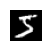

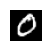

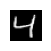

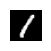

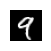

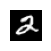

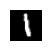

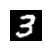

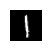

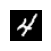

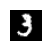

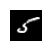

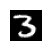

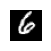

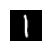

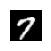

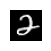

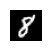

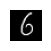

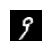

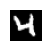

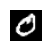

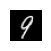

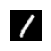

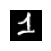

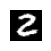

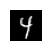

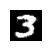

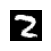

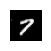

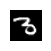

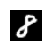

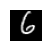

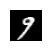

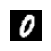

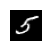

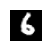

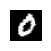

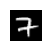

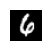

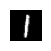

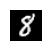

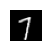

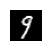

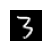

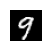

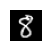

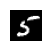

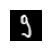

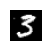

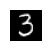

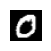

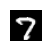

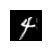

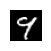

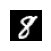

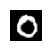

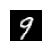

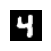

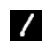

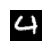

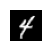

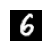

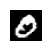

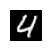

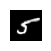

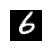

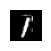

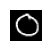

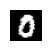

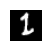

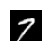

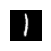

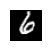

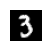

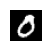

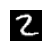

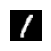

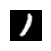

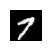

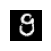

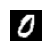

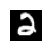

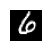

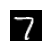

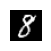

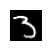

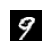

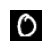

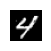

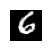

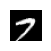

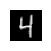

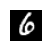

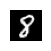

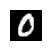

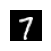

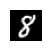

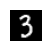

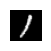

In [ ]:
for i in range (100):
  plt.subplot(10, 10, i+1)
  plt.axis('off')
  plt.imshow(xtrain[i], cmap='gray')
  plt.show()

In [ ]:
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
model=Sequential()
model.add(Flatten())        #flatten - to convert image (pixels) to numbers
model.add(Dense(784,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(xtrain,ytrain,epochs=15,validation_data=(xtest,ytest))

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9018 - loss: 0.3244 - val_accuracy: 0.9713 - val_loss: 0.0952
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9752 - loss: 0.0786 - val_accuracy: 0.9732 - val_loss: 0.0825
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 11ms/step - accuracy: 0.9859 - loss: 0.0472 - val_accuracy: 0.9809 - val_loss: 0.0653
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9902 - loss: 0.0311 - val_accuracy: 0.9784 - val_loss: 0.0707
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9929 - loss: 0.0215 - val_accuracy: 0.9789 - val_loss: 0.0736
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9941 - loss: 0.0187 - val_accuracy: 0.9797 - val_loss: 0.0759
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9951 - loss: 0.0145 - val_accuracy: 0.9789 - val_loss: 0.0771
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.9955 -

In [ ]:
ypred = model.predict(xtest)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [ ]:
print(ypred[0])

[5.0148323e-15 5.8607798e-17 2.9437217e-13 5.1784410e-12 2.8015101e-23
 1.1244496e-16 1.5215470e-22 9.9999994e-01 6.1240394e-14 4.1341255e-10]


In [ ]:
print(ypred[0].argmax())

7


In [ ]:
print(ytest[0])

7


In [ ]:
truepred= ypred.argmax(axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
ac = accuracy_score (ytest, truepred)
ac

0.9805

In [ ]:
cm = confusion_matrix(ytest, truepred)
cm

array([[ 972,    0,    1,    0,    1,    0,    3,    1,    1,    1],
       [   0, 1131,    1,    1,    0,    0,    1,    1,    0,    0],
       [   4,    0, 1015,    1,    0,    0,    1,    9,    2,    0],
       [   0,    0,    5,  985,    0,   10,    0,    3,    0,    7],
       [   1,    0,    3,    0,  956,    0,    5,    2,    0,   15],
       [   2,    0,    0,    3,    1,  878,    5,    0,    1,    2],
       [   2,    2,    0,    1,    7,    6,  939,    0,    1,    0],
       [   1,    1,   10,    0,    1,    0,    0, 1002,    3,   10],
       [   5,    1,    4,    4,    3,   11,    2,    0,  937,    7],
       [   3,    3,    0,    1,    7,    2,    0,    2,    1,  990]])

In [ ]:
import cv2
img = cv2.imread('/content/WhatsApp Image 2026-01-29 at 3.07.25 PM (1).jpeg')
img.shape

(422, 383, 3)

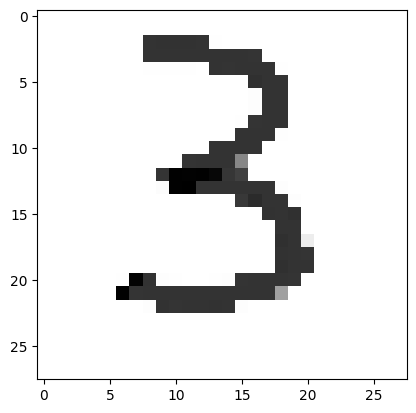

In [ ]:

img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(28,28))
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
import numpy as np   #for array

In [ ]:
prediction = model.predict(np.array([img]))
print(prediction.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
5


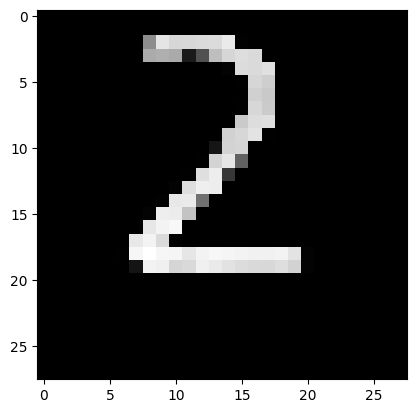

In [ ]:
# for another image
import cv2
img = cv2.imread('/content/WhatsApp Image 2026-01-29 at 3.07.25 PM.jpeg')
img.shape


img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img=cv2.resize(img,(28,28))
img = cv2.bitwise_not(img)  # we need to do bitwise not for the img to be exactly same as the dataset
plt.imshow(img,cmap='gray')
plt.show()